# Problem Statement
Choose an appropriate model for the project to predict the customers who are eligible for the loan and also find out what are the missing criteria why other customers are not eligible for the loan 

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.metrics import accuracy_score

# Importing Dataset

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Pdatasets/Testing Data.csv')
df = pd.read_csv('/content/drive/MyDrive/Pdatasets/Training Data.csv')

# EDA (Exploratory Data Analysis)

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [ ]:
df.shape

(614, 13)

In [ ]:
df_test.shape

(367, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data has only float,object and integer values.
Variable column has null/missing values.

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


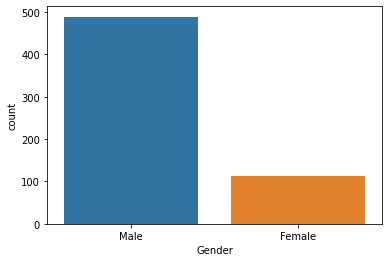

In [ ]:
sns.countplot(df['Gender']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


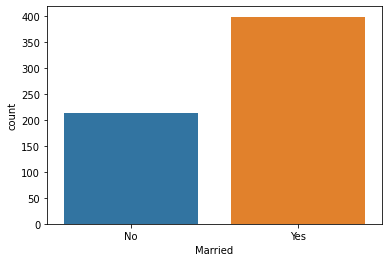

In [ ]:
sns.countplot(df['Married']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


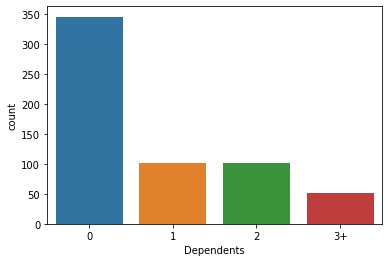

In [ ]:
sns.countplot(df['Dependents']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


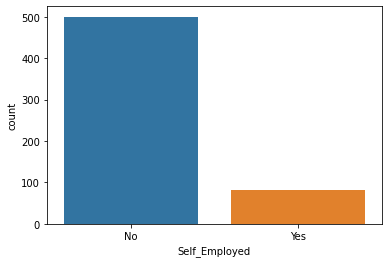

In [ ]:
sns.countplot(df['Self_Employed']);

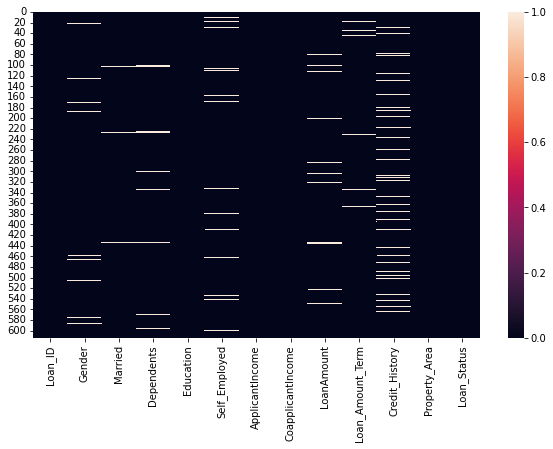

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull());

# Data Cleaning

In [ ]:
#Function for new ID column
def ID(data):
  for i in df.Loan_ID:
    i=re.sub('^\w\w00','',i)
    return i

In [ ]:
df['ID']=df.Loan_ID.apply(lambda x:ID(x))
df['ID']=df["ID"].astype(str).astype(int)
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
ID=df.pop('ID')
df.insert(0,'ID',ID)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 614 non-null    int64  
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
def ID(data):

  for i in df_test.Loan_ID:
    i=re.sub('^\w\w00','',i)
    return i

In [ ]:
df_test['ID']=df_test.Loan_ID.apply(lambda x:ID(x))
df_test['ID']=df_test["ID"].astype(str).astype(int)
df_test.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
ID=df_test.pop('ID')
df_test.insert(0,'ID',ID)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 367 non-null    int64  
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df.Gender.replace(["Male","Female"],[0,1],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df_test.Gender.replace(["Male","Female"],[0,1],inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

In [ ]:
df.Gender.isnull().sum()

0

In [ ]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df.Married.replace(["Yes","No"],[1,0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df_test.Married.replace(["Yes","No"],[1,0],inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)

In [ ]:
df.Married.isnull().sum()

0

In [ ]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df.Dependents.replace(["0","1","2","3+"],[0,1,2,3],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df_test.Dependents.replace(["0","1","2","3+"],[0,1,2,3],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)

In [ ]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df.Education.replace(["Graduate","Not Graduate"],[1,0],inplace=True)

df_test.Education.replace(["Graduate","Not Graduate"],[1,0],inplace=True)

In [ ]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df.Self_Employed.replace(["No","Yes"],[0,1],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df_test.Self_Employed.replace(["No","Yes"],[0,1],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)

In [ ]:
df.LoanAmount.isnull().sum()

22

In [ ]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

df_test.LoanAmount.fillna(df_test.LoanAmount.mean(),inplace=True)

In [ ]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

df_test.Loan_Amount_Term.fillna(df_test.Loan_Amount_Term.mean(),inplace=True)

In [ ]:
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)

df_test.Credit_History.fillna(df_test.Credit_History.mode()[0],inplace=True)

In [ ]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df.Property_Area.replace(["Semiurban","Urban","Rural"],[0,1,2],inplace=True)

df_test.Property_Area.replace(["Semiurban","Urban","Rural"],[0,1,2],inplace=True)

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df.Loan_Status.replace(["Y","N"],[1,0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 614 non-null    int64  
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 62.5 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 367 non-null    int64  
 1   Gender             367 non-null    float64
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    float64
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 34.5 KB


In [ ]:
df.columns

Index(['ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.head()

,ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1002,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1002,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1002,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1002,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,1


Correlation Matrix


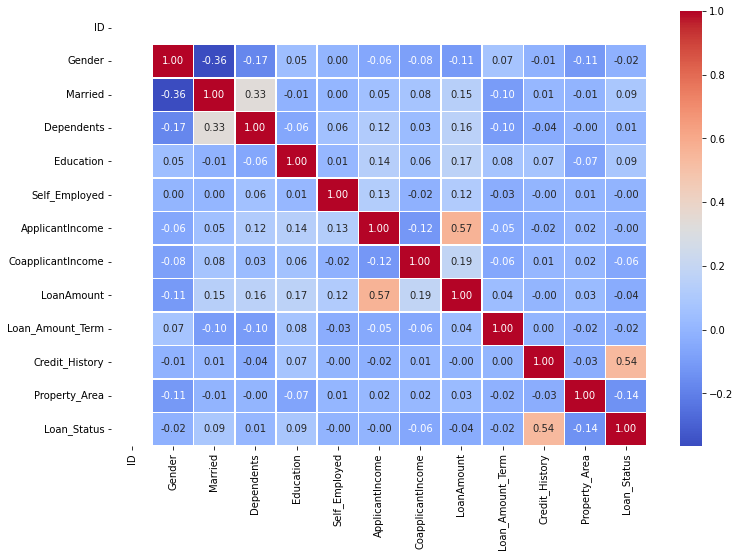

In [ ]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

# Feauture Engineering and Feauture Selection

In [ ]:
model = ExtraTreesRegressor()
X = df.drop('Loan_Status',axis=1)
y=df.Loan_Status
model.fit(X,y)
model.feature_importances_

array([0.        , 0.02253259, 0.01636733, 0.06205105, 0.02766962,
       0.02614562, 0.16708981, 0.12524361, 0.1736959 , 0.05137114,
       0.29220087, 0.03563246])

In [ ]:
important_features = pd.Series(model.feature_importances_, index=X.columns)

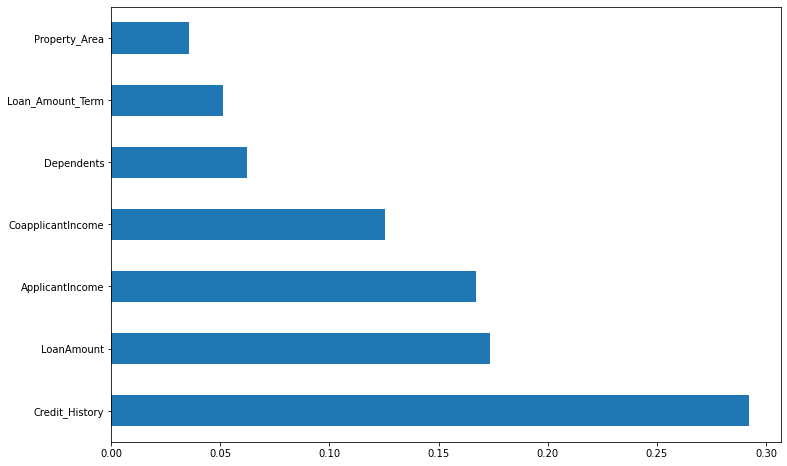

In [ ]:
important_features.nlargest(7).plot(kind='barh')

# Splitting Training and testing data

In [ ]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status'].values



In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [ ]:
x_train.shape

(429, 12)

In [ ]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test:',y_test.shape)

x_train : (429, 12)
x_test : (185, 12)
y_train : (429,)
y_test: (185,)


# Training the Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)
y_preddt = dt_classifier.predict(x_test)

print(classification_report(y_test,y_preddt))
print(f"Accuracy Score: {accuracy_score(y_test,y_preddt)}")
dt_results = accuracy_score(y_test,y_preddt)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        50
           1       0.83      0.80      0.82       135

    accuracy                           0.74       185
   macro avg       0.67      0.68      0.67       185
weighted avg       0.74      0.74      0.74       185

Accuracy Score: 0.7351351351351352


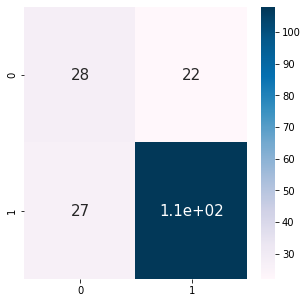

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_preddt)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100,
                                      criterion = "entropy",
                                      random_state =3)
rf_classifier.fit(x_train,y_train)
y_predrf = rf_classifier.predict(x_test)

print(classification_report(y_test,y_predrf))
print(f"Accuracy Score: {accuracy_score(y_test,y_predrf)}")
rf_results = accuracy_score(y_test,y_predrf)

              precision    recall  f1-score   support

           0       0.77      0.46      0.57        50
           1       0.83      0.95      0.88       135

    accuracy                           0.82       185
   macro avg       0.80      0.70      0.73       185
weighted avg       0.81      0.82      0.80       185

Accuracy Score: 0.8162162162162162


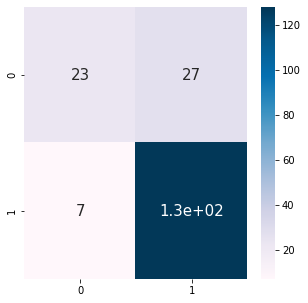

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_predrf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
predicted = logistic_model.predict(x_test)

print(classification_report(y_test,predicted))
print(f"Accuracy Score: {accuracy_score(y_test,predicted)}")
rf_results = accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       0.82      0.46      0.59        50
           1       0.83      0.96      0.89       135

    accuracy                           0.83       185
   macro avg       0.82      0.71      0.74       185
weighted avg       0.83      0.83      0.81       185

Accuracy Score: 0.827027027027027


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


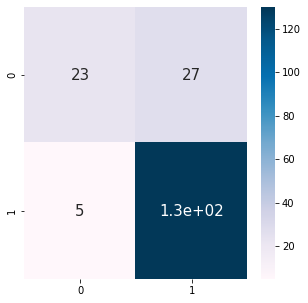

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, predicted)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
rf_results = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.29      0.20      0.24        50
           1       0.74      0.82      0.78       135

    accuracy                           0.65       185
   macro avg       0.51      0.51      0.51       185
weighted avg       0.62      0.65      0.63       185

Accuracy Score: 0.654054054054054


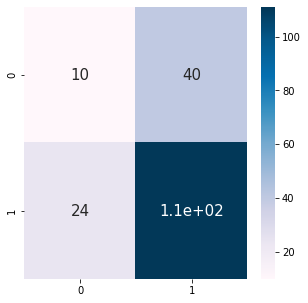

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# Comparing trained model with accuracy

Logistic Regressor: 83%

Decision Tree Classifier:73%

Random Forest Classifier: 82%

# Question and Answers

**1) What's the ratio of Male to Female? **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


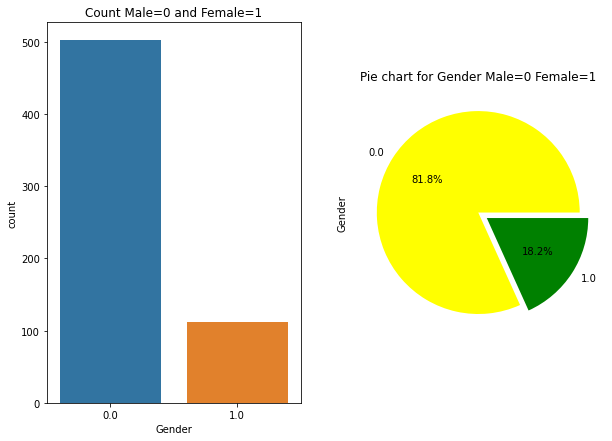

In [ ]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.title("Count Male=0 and Female=1")

plt.subplot(1,2,2)
count = df['Gender'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['yellow', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Gender Male=0 Female=1")

**Ans** :- Ratio of male to female is 1 : 4.5

**2) How many males are married and non-married?**

In [ ]:
len(df.loc[df.Gender==0,['Gender','Married']])

502

**Ans** :- There are 502 males that are married and non-married

**3) How many Females are married and non-married?**

In [ ]:
len(df.loc[df.Gender==1,['Gender','Married']])

112

**Ans** :- There are 112 females that are married and non-mareied

4) How many Males and Females are graduated and non-graduated with respect to their Marital status? 

In [ ]:
df_MGE=df.groupby(by =['Gender','Education','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'count'})

fig = px.bar(df_MGE, x="Gender", y="count", color="Married", barmode="group",
             facet_col="Education"
             )
fig.update_layout(title_text='Education Count With Gender,Married',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()


**Ans** :- 31 males are non-graduated and unmarried
           
   83 males are non-graduated and married

   14 females are non-graduated and unmarried

   6 females are non-graduated and married

   102 males are graduated and unmarried
           
   286 males are graduated and married

   66 females are graduated and unmarried

   26 females are graduated and married


**5) Which type of encoding will be required to perform on the "Education" column?**

**Ans** :- We can perform label encoding as the feature variables in the education columns are 0 and 1's. Label encoding gives more good labels as there are only 2 types of feature variables.

6) Is it a male or a female whose loan amount is the highest?

In [ ]:
df.loc[df['LoanAmount']==df['LoanAmount'].max(),['Gender','LoanAmount']]

,Gender,LoanAmount
171,0.0,700.0


**Ans** :- It is male whole loan amount is hightest with loan amount of 700

7) The specification and information about the applicant who has the highest income? 

In [ ]:
df.loc[df['ApplicantIncome']==df['ApplicantIncome'].max(),df.columns]

,ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,1002,0.0,1.0,3.0,1,0.0,81000,0.0,360.0,360.0,0.0,2,0


**Ans** :- Applicant with the ID 1002 is male and has highest income of 81000

8) What all features are you going to consider for the model training and why? 

**Ans** :- I have consider following features because by using feature engineering and ExtraTree Regressor the top 4 importance features are Credit_History, LoanAmount,ApplicantIncome,CoapplicantIncome. These features has higher correlation than other features.

9) Which model are you going to choose and define the reason for going with the same model? 

**Ans** :- I have used Logistic Regression, Decision Tree Classifier and Random Forest Classifier.
 The dependent variable is in categorical form is its best to use classification models. 

 Logistic Regression: It understands relationships better between dependent variable and one or more independent vairables by estimating Probabilities using logistic regression equation.

 Decision Tree Classifier: It uses tree structure to show predictions that result from series of feature based splits.

 Random Forest Classifier: It is strong and fast model and outperforms decision trees.

10) Have you performed the Hyper Parameter Tuning? 

**Ans** :- I have used Hyper Parameter Tuning on the Random Forest Classifier model

11) Compare the Actual results with the Predicted results 

In [ ]:
newdf_logistic=pd.DataFrame({'Actual':y_test,'Predicted':y_predrf})
newdf_logistic.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


12) What's the accuracy of your model? 

**Ans** :- Logistic Regressor: 82%

Decision Tree Classifier:79%

Random Forest Classifier: 82%

13) In order to improve the accuracy, what more approaches can be done? 

**Ans** :- For increasing the accuracy of the model we can use more feature scaling and hyper parameter tuning . We can also add more data to the training dataset which will also result into improving model performance.We can also search and remove the outliers.

14) What can you conclude with respect to the data? 

Dataset comprises of 614 observations and 13 characteristics.
Out of which one is dependent variable and rest 12 are independent variables. There are three types of datatype dtypes: float64(4), int64(1), object(8)



In [ ]:
import pickle
filename='loan_pred_model'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded=pickle.load(open(filename,'rb'))
loaded.predict(x_test)

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.])